Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS201.M11.2

Buổi 02 - 13/10/2021

#LAB 02 - CÁC KỸ THUẬT TỐI ƯU HOÁ MÔ HÌNH 

## Setup

### Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn


from keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.initializers  import GlorotUniform, Zeros, Ones
from keras.callbacks import EarlyStopping

sn.set() # Set theme

### Load bộ dữ liệu

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Chuẩn bị dữ liệu

In [3]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, 
                                                  test_size=0.1)

In [4]:
print('X_train = {}'.format(X_train.shape))
print('y_train = {}'.format(y_train.shape))
print('X_dev = {}'.format(X_dev.shape))
print('y_dev = {}'.format(y_dev.shape))
print('X_test = {}'.format(X_test.shape))
print('y_test = {}'.format(y_test.shape))

X_train = (54000, 28, 28)
y_train = (54000,)
X_dev = (6000, 28, 28)
y_dev = (6000,)
X_test = (10000, 28, 28)
y_test = (10000,)


In [5]:
X_train_reshaped = X_train.reshape(-1, 28*28)
X_dev_reshaped = X_dev.reshape(-1, 28*28)
X_test_reshaped = X_test.reshape(-1, 28*28)

In [6]:
y_train_new = to_categorical(y_train, num_classes = 10)
y_dev_new = to_categorical(y_dev, num_classes = 10)

In [7]:
print('X_train_reshaped = {}'.format(X_train_reshaped.shape))
print('y_train_new = {}'.format(y_train_new.shape))
print('X_dev_reshaped = {}'.format(X_dev_reshaped.shape))
print('y_dev_new = {}'.format(y_dev_new.shape))
print('X_test_reshaped = {}'.format(X_test_reshaped.shape))
print('y_test = {}'.format(y_test.shape))

X_train_reshaped = (54000, 784)
y_train_new = (54000, 10)
X_dev_reshaped = (6000, 784)
y_dev_new = (6000, 10)
X_test_reshaped = (10000, 784)
y_test = (10000,)


## **Bài 1**:
Thực hiện huấn luyện mô hình mạng neural ở Mục 3 trên bộ dữ liệu MNIST. Vẽ 
đồ thị học của mô hình với thông số `accuracy` và `loss`. 

### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_1 = Sequential()

model_1.add(Dense(784, input_shape=(784, ), activation='relu'))
model_1.add(Dense(10, input_shape=(10, ), activation='sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=0.01)
Loss = BinaryCrossentropy()
model_1.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_1 = model_1.fit(X_train_reshaped, y_train_new, 
                        validation_data=(X_dev_reshaped, y_dev_new),
                        batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 4s 4ms/step - loss: 0.9699 - accuracy: 0.8790 - val_loss: 0.1319 - val_accuracy: 0.9157
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0807 - accuracy: 0.9408 - val_loss: 0.0951 - val_accuracy: 0.9320
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0516 - accuracy: 0.9562 - val_loss: 0.0818 - val_accuracy: 0.9372
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9660 - val_loss: 0.0743 - val_accuracy: 0.9433
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9726 - val_loss: 0.0711 - val_accuracy: 0.9458
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0229 - accuracy: 0.9775 - val_loss: 0.0686 - val_accuracy: 0.9483
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0190 - accuracy: 0.9811 - val_loss: 0.0665 - val_accuracy: 0.9503
Epoch 

### Visualization Loss & Accuracy

#### Accuracy

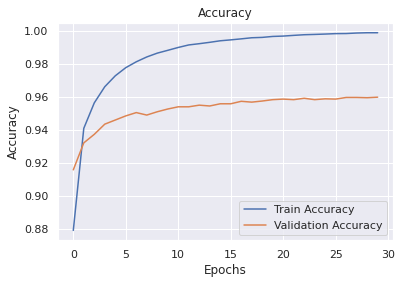

In [ ]:
plt.figure(0)
plt.plot(history_1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

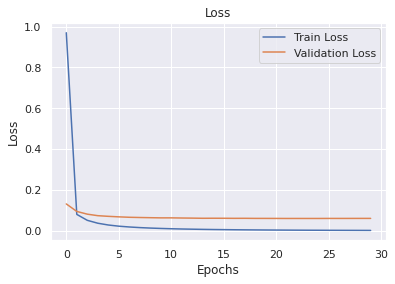

In [ ]:
plt.figure(0)
plt.plot(history_1.history['loss'], label = 'Train Loss')
plt.plot(history_1.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [ ]:
y_pred = model_1.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 96.05%


## **Bài 2**:
Thực hiện huấn luyện mô hình mạng neural ở bài 1 với kỹ thuật `regularization` 
cho tham số $W$ và $b$ với $\lambda = 0.01$. Cho biết kết quả huấn luyện mô hình trước và sau khi áp dụng kỹ thuật `regularization` (Dựa vào đồ thị học). 

### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_2 = Sequential()
# Áp dụng kỹ thuật regularization với lambda = 0.01
model_2.add(Dense(784, input_shape=(784, ), 
                  kernel_regularizer = l2 (0.01),
                  bias_regularizer = l2 (0.01),
                  activation='relu'))
model_2.add(Dense(10, input_shape=(10, ), 
                  kernel_regularizer = l2 (0.01), 
                  bias_regularizer = l2 (0.01),
                  activation='sigmoid'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=0.01)
Loss = BinaryCrossentropy()
model_2.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_2 = model_2.fit(X_train_reshaped, y_train_new, 
                        validation_data=(X_dev_reshaped, y_dev_new),
                        batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 8.5777 - accuracy: 0.8781 - val_loss: 6.9297 - val_accuracy: 0.9267
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 6.3479 - accuracy: 0.9393 - val_loss: 5.8277 - val_accuracy: 0.9373
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 5.3417 - accuracy: 0.9551 - val_loss: 4.9157 - val_accuracy: 0.9458
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 4.5050 - accuracy: 0.9653 - val_loss: 4.1514 - val_accuracy: 0.9512
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 3.8035 - accuracy: 0.9716 - val_loss: 3.5082 - val_accuracy: 0.9562
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 3.2130 - accuracy: 0.9764 - val_loss: 2.9658 - val_accuracy: 0.9583
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 2.7155 - accuracy: 0.9796 - val_loss: 2.5084 - val_accuracy: 0.9617
Epoch 

### Visualization Loss & Accuracy

#### Accuracy

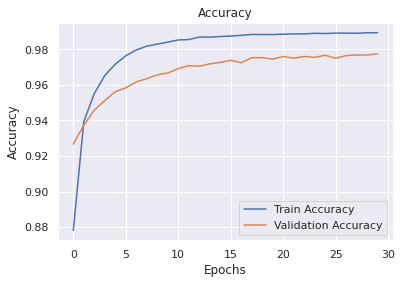

In [ ]:
plt.figure(0)
plt.plot(history_2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

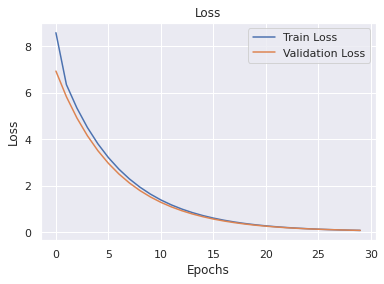

In [ ]:
plt.figure(0)
plt.plot(history_2.history['loss'], label = 'Train Loss')
plt.plot(history_2.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [ ]:
y_pred = model_2.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 97.98%


### Kết luận:


*   Accuracy trên tập train bắt đầu hội tụ ở epoch thứ 10, accuracy trên tập dev bắt đầu hội tụ ở epoch thứ 20. Accuracy trên tập train cao $(\sim 98.9\%)$ , accuracy trên tập dev cao $(\sim 98.0\%)$, chênh lệnh khoảng 1.0\%. Khoảng cách chênh lệch đã giảm đi đáng kể, hay nói cách khác là đã khắc phục được hiện tượng Overfitting ở bài 1 bằng kỹ thuật regularization.
*   Loss giảm nhanh và đều qua các epoch, không có hiện tượng giảm đột ngột như bài 1. Giá trị Loss của train và dev gần như bằng nhau qua các epoch. Loss của train và dev hội tụ cùng nhau (khoảng epoch thứ 25).
*   Accuracy của mô hình khi kiểm tra trên tập test cao (Accuracy test = $97.98\%$), cao hơn đáng kể so với accuracy test của mô hình ở bài 1.




## **Bài 3**:
Thực hiện huấn luyện mô hình mạng neural ở bài 1 với kỹ thuật khởi tạo tham 
số cho tham số $W$. Nếu sử dụng kỹ thuật khởi tạo tham số là 1 cho tham số $W$ thì kết quả độ chính xác mô hình như thế nào? 

### Khởi tạo với:

    kernel_initializer = Zeros,
    bias_initializer = Zeros,

#### Xây dựng mạng neural bằng keras

In [8]:
# Khởi tạo model
model_3a = Sequential()
# Áp dụng kỹ thuật khởi tạo tham số cho W, với W = 1
model_3a.add(Dense(784, input_shape=(784, ), 
                  kernel_initializer = Zeros,
                  bias_initializer= Zeros,
                  activation='relu'))
model_3a.add(Dense(10, input_shape=(10, ), 
                  activation='sigmoid'))

In [9]:
model_3a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [10]:
# Compile model
Optimizer = SGD(learning_rate=0.01)
Loss = BinaryCrossentropy()
model_3a.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [11]:
# Training model
history_3a = model_3a.fit(X_train_reshaped, y_train_new, 
                          validation_data=(X_dev_reshaped, y_dev_new),
                          batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 5s 4ms/step - loss: 0.6617 - accuracy: 0.1116 - val_loss: 0.6323 - val_accuracy: 0.1125
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.6068 - accuracy: 0.1124 - val_loss: 0.5829 - val_accuracy: 0.1125
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.5621 - accuracy: 0.1124 - val_loss: 0.5427 - val_accuracy: 0.1125
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.5258 - accuracy: 0.1124 - val_loss: 0.5098 - val_accuracy: 0.1125
Epoch 5/30
422/422 [==============================] - 1s 4ms/step - loss: 0.4959 - accuracy: 0.1124 - val_loss: 0.4828 - val_accuracy: 0.1125
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4713 - accuracy: 0.1124 - val_loss: 0.4605 - val_accuracy: 0.1125
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4509 - accuracy: 0.1124 - val_loss: 0.4419 - val_accuracy: 0.1125
Epoch 

#### Visualization Loss & Accuracy

##### Accuracy

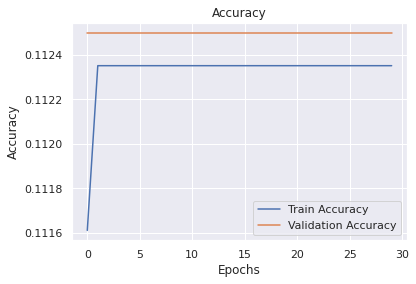

In [12]:
plt.figure(0)
plt.plot(history_3a.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_3a.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

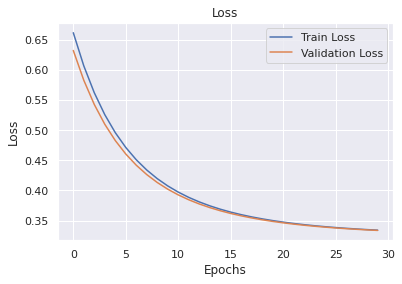

In [13]:
plt.figure(0)
plt.plot(history_3a.history['loss'], label = 'Train Loss')
plt.plot(history_3a.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [14]:
y_pred = model_3a.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 11.35%


### Khởi tạo với:

    kernel_initializer = Ones,
    bias_initializer = Ones,

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_3b = Sequential()
# Áp dụng kỹ thuật khởi tạo tham số cho W, với W = 1
model_3b.add(Dense(784, input_shape=(784, ),
                   kernel_initializer = Ones,
                   bias_initializer= Ones,
                   activation='relu'))
model_3b.add(Dense(10, input_shape=(10, ), 
                   activation='sigmoid'))

In [ ]:
model_3b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=0.01)
Loss = BinaryCrossentropy()
model_3b.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_3b = model_3b.fit(X_train_reshaped, y_train_new, 
                          validation_data=(X_dev_reshaped, y_dev_new),
                          batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 105086.4844 - accuracy: 0.1111 - val_loss: 0.6323 - val_accuracy: 0.1190
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 20.9044 - accuracy: 0.1116 - val_loss: 0.5829 - val_accuracy: 0.1190
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.5622 - accuracy: 0.1116 - val_loss: 0.5427 - val_accuracy: 0.1190
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.5258 - accuracy: 0.1116 - val_loss: 0.5098 - val_accuracy: 0.1190
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4959 - accuracy: 0.1116 - val_loss: 0.4828 - val_accuracy: 0.1190
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4713 - accuracy: 0.1116 - val_loss: 0.4605 - val_accuracy: 0.1190
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.4509 - accuracy: 0.1116 - val_loss: 0.4419 - val_accuracy: 0.1190


#### Visualization Loss & Accuracy

##### Accuracy

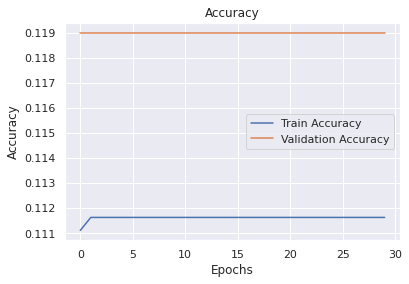

In [ ]:
plt.figure(0)
plt.plot(history_3b.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_3b.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

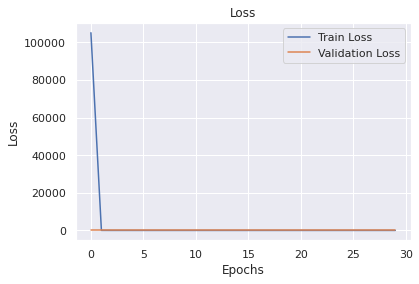

In [ ]:
plt.figure(0)
plt.plot(history_3b.history['loss'], label = 'Train Loss')
plt.plot(history_3b.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred = model_3b.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 11.35%


### Khởi tạo với:

    kernel_initializer = GlorotUniform,
    bias_initializer = Ones,

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_3c = Sequential()
# Áp dụng kỹ thuật khởi tạo tham số cho W, với W = 1
model_3c.add(Dense(784, input_shape=(784, ), 
                   kernel_initializer = GlorotUniform,
                   bias_initializer= Ones,
                   activation='relu'))
model_3c.add(Dense(10, input_shape=(10, ), 
                   activation='sigmoid'))

In [ ]:
model_3c.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=0.01)
Loss = BinaryCrossentropy()
model_3c.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_3c = model_3c.fit(X_train_reshaped, y_train_new, 
                          validation_data=(X_dev_reshaped, y_dev_new),
                          batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 1.4586 - accuracy: 0.8742 - val_loss: 0.1163 - val_accuracy: 0.9177
Epoch 2/30
422/422 [==============================] - 1s 4ms/step - loss: 0.0791 - accuracy: 0.9331 - val_loss: 0.0870 - val_accuracy: 0.9277
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0525 - accuracy: 0.9491 - val_loss: 0.0743 - val_accuracy: 0.9373
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9587 - val_loss: 0.0683 - val_accuracy: 0.9420
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0319 - accuracy: 0.9660 - val_loss: 0.0645 - val_accuracy: 0.9452
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0266 - accuracy: 0.9711 - val_loss: 0.0617 - val_accuracy: 0.9458
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0229 - accuracy: 0.9747 - val_loss: 0.0598 - val_accuracy: 0.9487
Epoch 

#### Visualization Loss & Accuracy

##### Accuracy

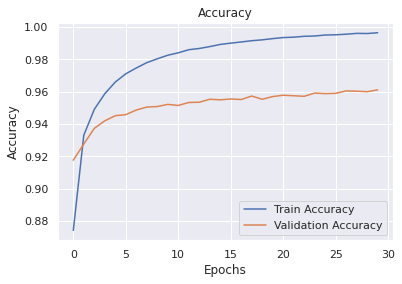

In [ ]:
plt.figure(0)
plt.plot(history_3c.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_3c.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

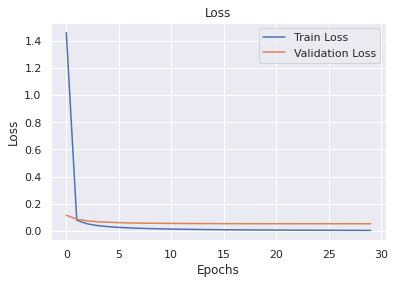

In [ ]:
plt.figure(0)
plt.plot(history_3c.history['loss'], label = 'Train Loss')
plt.plot(history_3c.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred = model_3c.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 96.21%


### Kết luận:



*    Khi khởi tạo `kernel_initializer=Zeros, bias_initializer=Zeros` hoặc `kernel_initializer=Ones, bias_initializer=Ones` thì mô hình thu được sẽ có hiện tượng bị underfitting. Độ chính xác của mô hình khi đánh giá trên tập test rất thấp $(11.35\%)$, nên mô hình rất tệ.

*   Khi khởi tạo `kernel_initializer=GlorotUniform, bias_initializer=Ones` thì mô hình thu được sẽ có hiện tượng bị overfitting (giống với bài 1). Độ chính xác của mô hình khi đánh giá trên tập test rất cao $(96.21\%)$.

*   Vậy, bước khởi tạo tham số cho mô hình có ảnh hưởng lớn đến kết quả của mô hình thu được, khởi tạo hợp lý thì sẽ thu được mô hình có kết quả cao, còn khởi tạo với 0 hoặc 1 thì thu được mô hình có kết quả tệ như bài trên.




## **Bài 4**:
Thực hiện huấn luyện mô hình mạng neural ở bài 2 (đã áp dụng `regularization`) 
với thuật toán optimizer `RMSProp` và `Adam`. So sánh kết quả giữa 2 thuật toán. 

### Xây dựng model với `optimizer=SGD, momentum=0.9`

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_4a = Sequential()
# Áp dụng kỹ thuật regularization với lambda = 0.01
model_4a.add(Dense(784, input_shape=(784, ), 
                   kernel_regularizer = l2 (0.01),
                   bias_regularizer = l2 (0.01),
                   activation='relu'))
model_4a.add(Dense(10, input_shape=(10, ), 
                   kernel_regularizer = l2 (0.01), 
                   bias_regularizer = l2 (0.01),
                   activation='sigmoid'))

In [ ]:
model_4a.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=0.01, momentum=0.9)
Loss = BinaryCrossentropy()
model_4a.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_4a = model_4a.fit(X_train_reshaped, y_train_new, 
                          validation_data=(X_dev_reshaped, y_dev_new),
                          batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 5ms/step - loss: 20.7438 - accuracy: 0.8711 - val_loss: 7.4967 - val_accuracy: 0.9333
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 3.6071 - accuracy: 0.9439 - val_loss: 1.3893 - val_accuracy: 0.9385
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.6830 - accuracy: 0.9559 - val_loss: 0.2891 - val_accuracy: 0.9508
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1608 - accuracy: 0.9588 - val_loss: 0.0886 - val_accuracy: 0.9637
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0664 - accuracy: 0.9622 - val_loss: 0.0572 - val_accuracy: 0.9555
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0482 - accuracy: 0.9657 - val_loss: 0.0493 - val_accuracy: 0.9617
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9642 - val_loss: 0.0492 - val_accuracy: 0.9587
Epoch

#### Visualization Loss & Accuracy

##### Accuracy

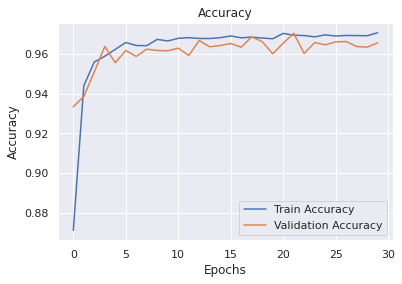

In [ ]:
plt.figure(0)
plt.plot(history_4a.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_4a.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

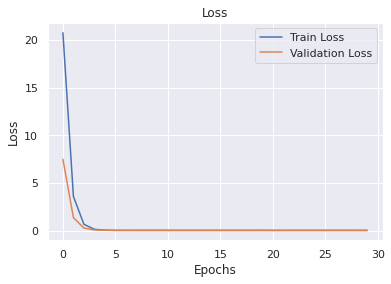

In [ ]:
plt.figure(0)
plt.plot(history_4a.history['loss'], label = 'Train Loss')
plt.plot(history_4a.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred = model_4a.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 96.93%


### Xây dựng model với `optimizer=RMSProp`

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_4b = Sequential()

model_4b.add(Dense(784, input_shape=(784, ), 
                   activation='relu'))
model_4b.add(Dense(10, input_shape=(10, ), 
                   activation='sigmoid'))

In [ ]:
model_4b.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = RMSprop(learning_rate=1e-4)
Loss = BinaryCrossentropy()
model_4b.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_4b = model_4b.fit(X_train_reshaped, y_train_new, 
                          validation_data=(X_dev_reshaped, y_dev_new),
                          batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 3s 5ms/step - loss: 0.9514 - accuracy: 0.8525 - val_loss: 0.3816 - val_accuracy: 0.9267
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2761 - accuracy: 0.9418 - val_loss: 0.2583 - val_accuracy: 0.9445
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1685 - accuracy: 0.9607 - val_loss: 0.2475 - val_accuracy: 0.9472
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9707 - val_loss: 0.2196 - val_accuracy: 0.9545
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0839 - accuracy: 0.9786 - val_loss: 0.1690 - val_accuracy: 0.9610
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0631 - accuracy: 0.9830 - val_loss: 0.1728 - val_accuracy: 0.9642
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0475 - accuracy: 0.9866 - val_loss: 0.1533 - val_accuracy: 0.9678
Epoch 

#### Visualization Loss & Accuracy

##### Accuracy

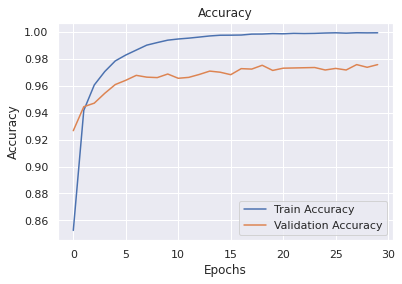

In [ ]:
plt.figure(0)
plt.plot(history_4b.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_4b.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

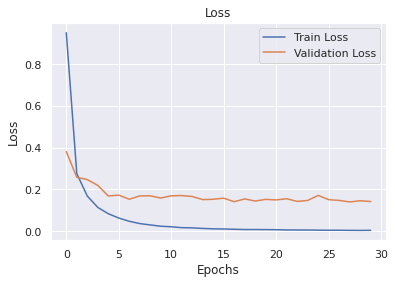

In [ ]:
plt.figure(0)
plt.plot(history_4b.history['loss'], label = 'Train Loss')
plt.plot(history_4b.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred = model_4b.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 97.54%


### Xây dựng model với `optimizer=Adam`

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_4c = Sequential()
# Áp dụng kỹ thuật regularization với lambda = 0.01
model_4c.add(Dense(784, input_shape=(784, ), 
                   kernel_regularizer = l2 (0.01),
                   bias_regularizer = l2 (0.01),
                   activation='relu'))
model_4c.add(Dense(10, input_shape=(10, ), 
                   kernel_regularizer = l2 (0.01), 
                   bias_regularizer = l2 (0.01),
                   activation='sigmoid'))

In [ ]:
model_4c.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = BinaryCrossentropy()
model_4c.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_4c = model_4c.fit(X_train_reshaped, y_train_new, 
                          validation_data=(X_dev_reshaped, y_dev_new),
                          batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 3s 5ms/step - loss: 7.6509 - accuracy: 0.8191 - val_loss: 5.5921 - val_accuracy: 0.9070
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 4.8177 - accuracy: 0.9294 - val_loss: 4.3050 - val_accuracy: 0.9360
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 3.8391 - accuracy: 0.9516 - val_loss: 3.5622 - val_accuracy: 0.9460
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 3.1870 - accuracy: 0.9636 - val_loss: 3.0171 - val_accuracy: 0.9442
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 2.6763 - accuracy: 0.9725 - val_loss: 2.5443 - val_accuracy: 0.9535
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 2.2564 - accuracy: 0.9775 - val_loss: 2.1562 - val_accuracy: 0.9570
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 1.9018 - accuracy: 0.9799 - val_loss: 1.8149 - val_accuracy: 0.9592
Epoch 

#### Visualization Loss & Accuracy

##### Accuracy

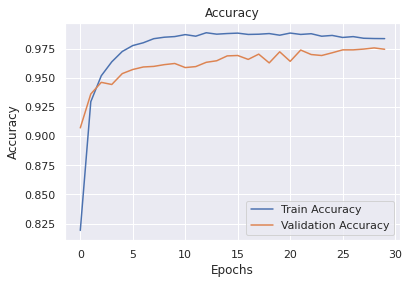

In [ ]:
plt.figure(0)
plt.plot(history_4c.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_4c.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

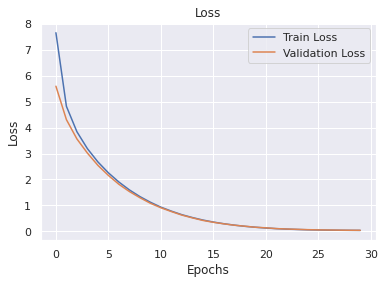

In [ ]:
plt.figure(0)
plt.plot(history_4c.history['loss'], label = 'Train Loss')
plt.plot(history_4c.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred = model_4c.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 97.57%


### Kết luận:
* Mô hình với hàm `optimazer=Adam` và mô hình với hàm `optimazer=RMSProp` có Accuracy test khá tương đương nhau. Nhưng nhìn chung mô hình với hàm `optimazer=Adam` tốt hơnmô hình với hàm `optimazer=RMSProp` vì mô hình với hàm `optimazer=RMSProp` có hơi bị overfitting nhẹ, còn mô hình với hàm `optimazer=Adam` không bị underfitting hay overfitting.


## **Bài 5**:
Hãy giảm `batch size` xuống 8 và huấn luyện mô hình mạng neural ở bài 2 (sử dụng optimizer `SGD`). Khi `batch_size` nhỏ thì có chuyện gì xảy ra (dựa vào đồ thị học).

### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_5 = Sequential()
# Áp dụng kỹ thuật regularization với lambda = 0.01
model_5.add(Dense(784, input_shape=(784, ), 
                  kernel_regularizer = l2 (0.01),
                  bias_regularizer = l2 (0.01),
                  activation='relu'))
model_5.add(Dense(10, input_shape=(10, ), 
                  kernel_regularizer = l2 (0.01), 
                  bias_regularizer = l2 (0.01),
                  activation='sigmoid'))

In [ ]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=0.01)
Loss = BinaryCrossentropy()
model_5.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_5 = model_5.fit(X_train_reshaped, y_train_new, 
                        validation_data=(X_dev_reshaped, y_dev_new),
                        batch_size=8, epochs=30)

Epoch 1/30
6750/6750 [==============================] - 21s 3ms/step - loss: 3.1193 - accuracy: 0.9175 - val_loss: 0.6238 - val_accuracy: 0.9438
Epoch 2/30
6750/6750 [==============================] - 21s 3ms/step - loss: 0.2524 - accuracy: 0.9504 - val_loss: 0.0902 - val_accuracy: 0.9600
Epoch 3/30
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0698 - accuracy: 0.9546 - val_loss: 0.0584 - val_accuracy: 0.9583
Epoch 4/30
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0572 - accuracy: 0.9557 - val_loss: 0.0542 - val_accuracy: 0.9583
Epoch 5/30
6750/6750 [==============================] - 20s 3ms/step - loss: 0.0566 - accuracy: 0.9557 - val_loss: 0.0589 - val_accuracy: 0.9485
Epoch 6/30
6750/6750 [==============================] - 20s 3ms/step - loss: 0.0555 - accuracy: 0.9579 - val_loss: 0.0548 - val_accuracy: 0.9588
Epoch 7/30
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0553 - accuracy: 0.9585 - val_loss: 0.0547 - val_ac

### Visualization Loss & Accuracy

#### Accuracy

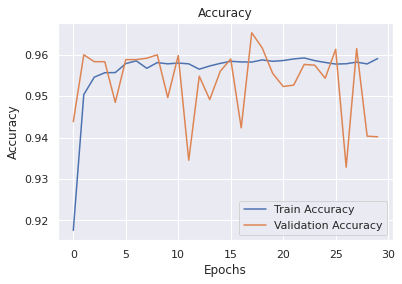

In [ ]:
plt.figure(0)
plt.plot(history_5.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

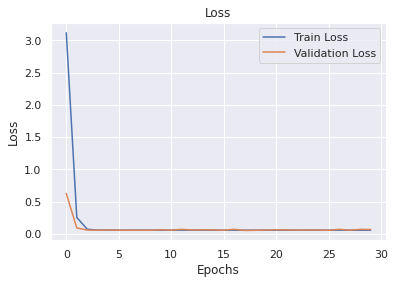

In [ ]:
plt.figure(0)
plt.plot(history_5.history['loss'], label = 'Train Loss')
plt.plot(history_5.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [ ]:
y_pred = model_5.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 94.59%


### Kết luận:


*   Accuracy trên tập train tăng và có xu hướng hội tụ qua các epoch, còn accuracy trên tập dev lại dao động mạnh (lúc tăng lúc giảm) và chưa có xu hướng hội tụ.
*   Loss giảm nhanh và hội tụ ngay những epoch đầu tiên (khoảng epoch thứ 3).
*   Thời gian training model sẽ tăng lên khi giảm batch size.
*   Accuracy của mô hình khi kiểm tra trên tập test cao (Accuracy test = 94.59\%), thấp hơn đáng kể so với accuracy test của mô hình ở bài 2.






## **Bài 6**:
Hãy tăng `epoch` lên 100 và huấn luyện mô hình bài 5. Cho biết kết quả. 

### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_6 = Sequential()
# Áp dụng kỹ thuật regularization với lambda = 0.01
model_6.add(Dense(784, input_shape=(784, ), 
                  kernel_regularizer = l2 (0.01),
                  bias_regularizer = l2 (0.01),
                  activation='relu'))
model_6.add(Dense(10, input_shape=(10, ), 
                  kernel_regularizer = l2 (0.01), 
                  bias_regularizer = l2 (0.01),
                  activation='sigmoid'))

In [ ]:
model_6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=0.01)
Loss = BinaryCrossentropy()
callback = EarlyStopping(monitor='val_loss', patience=3)
model_6.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_6 = model_6.fit(X_train_reshaped, y_train_new, 
                        validation_data=(X_dev_reshaped, y_dev_new),
                        batch_size=8, epochs=100, 
                        callbacks=[callback])

Epoch 1/100
6750/6750 [==============================] - 22s 3ms/step - loss: 3.0452 - accuracy: 0.9139 - val_loss: 0.6123 - val_accuracy: 0.9503
Epoch 2/100
6750/6750 [==============================] - 21s 3ms/step - loss: 0.2491 - accuracy: 0.9526 - val_loss: 0.0942 - val_accuracy: 0.9535
Epoch 3/100
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0704 - accuracy: 0.9534 - val_loss: 0.0679 - val_accuracy: 0.9428
Epoch 4/100
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0577 - accuracy: 0.9560 - val_loss: 0.0616 - val_accuracy: 0.9485
Epoch 5/100
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0560 - accuracy: 0.9575 - val_loss: 0.0569 - val_accuracy: 0.9595
Epoch 6/100
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0563 - accuracy: 0.9556 - val_loss: 0.0660 - val_accuracy: 0.9430
Epoch 7/100
6750/6750 [==============================] - 21s 3ms/step - loss: 0.0559 - accuracy: 0.9583 - val_loss: 0.0513 -

### Visualization Loss & Accuracy

#### Accuracy

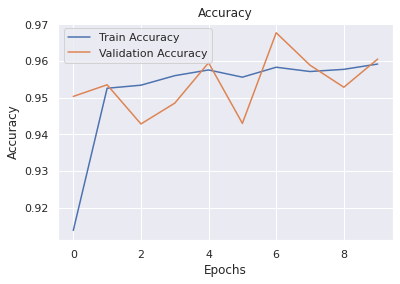

In [ ]:
plt.figure(0)
plt.plot(history_6.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

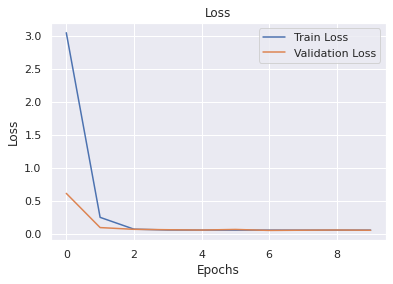

In [ ]:
plt.figure(0)
plt.plot(history_6.history['loss'], label = 'Train Loss')
plt.plot(history_6.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [ ]:
y_pred = model_6.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 96.48%


### Kết luận:


*   Loss giảm nhanh và hội tụ ngay những epoch đầu tiên (khoảng epoch thứ 3).
*   Thời gian training model sẽ tăng lên khi giảm batch size.
*   Mô hình đã dừng sớm ở epoch thứ 10 thay vì chạy hết cả 100 epoch. Nguyên nhân là vì val\_loss đã tăng liên tiếp 3 lần nên mô hình bị dừng sớm để tránh hiện tượng bị underfitting.
*   Accuracy của mô hình khi kiểm tra trên tập test cao (Accuracy test = 96.48\%), cao hơn đáng kể so với accuracy test của mô hình ở bài 5




## **Bài 7**:*
Thực hiện các yêu cầu từ Bài 1, Bài 2, Bài 6 với bộ dữ liệu CIFAR10. 

### Set up

#### Load bộ dữ liệu

In [ ]:
from keras.datasets.cifar10 import load_data

(X_train_bai7, y_train_bai7), (X_test_bai7, y_test_bai7) = load_data()

170508288/170498071 [==============================] - 2s 0us/step


#### Chuẩn bị dữ liệu

In [ ]:
X_train_bai7,X_dev_bai7,y_train_bai7,y_dev_bai7=train_test_split(X_train_bai7,
                                                                 y_train_bai7,
                                                                 test_size=0.1)

In [ ]:
print('X_train_bai7 = {}'.format(X_train_bai7.shape))
print('y_train_bai7 = {}'.format(y_train_bai7.shape))
print('X_dev_bai7 = {}'.format(X_dev_bai7.shape))
print('y_dev_bai7 = {}'.format(y_dev_bai7.shape))
print('X_test_bai7 = {}'.format(X_test_bai7.shape))
print('y_test_bai7 = {}'.format(y_test_bai7.shape))

X_train_bai7 = (45000, 32, 32, 3)
y_train_bai7 = (45000, 1)
X_dev_bai7 = (5000, 32, 32, 3)
y_dev_bai7 = (5000, 1)
X_test_bai7 = (10000, 32, 32, 3)
y_test_bai7 = (10000, 1)


In [ ]:
X_train_bai7_reshaped = X_train_bai7.reshape(-1, 32*32*3)
X_dev_bai7_reshaped = X_dev_bai7.reshape(-1, 32*32*3)
X_test_bai7_reshaped = X_test_bai7.reshape(-1, 32*32*3)

In [ ]:
y_train_bai7_new = to_categorical(y_train_bai7, num_classes = 10)
y_dev_bai7_new = to_categorical(y_dev_bai7, num_classes = 10)

In [ ]:
print('X_train_bai7_reshaped = {}'.format(X_train_bai7_reshaped.shape))
print('y_train_bai7_new = {}'.format(y_train_bai7_new.shape))
print('X_dev_bai7_reshaped = {}'.format(X_dev_bai7_reshaped.shape))
print('y_dev_bai7_new = {}'.format(y_dev_bai7_new.shape))
print('X_test_bai7_reshaped = {}'.format(X_test_bai7_reshaped.shape))
print('y_test_bai7 = {}'.format(y_test_bai7.shape))

X_train_bai7_reshaped = (45000, 3072)
y_train_bai7_new = (45000, 10)
X_dev_bai7_reshaped = (5000, 3072)
y_dev_bai7_new = (5000, 10)
X_test_bai7_reshaped = (10000, 3072)
y_test_bai7 = (10000, 1)


### **Bài 7a**:
Thực hiện huấn luyện mô hình mạng neural ở Mục 3 trên bộ dữ liệu CIFAR10. Vẽ 
đồ thị học của mô hình với thông số `accuracy` và `loss`.

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_7a = Sequential()

model_7a.add(Dense(3072, input_shape=(3072, ), 
                   activation='relu'))
model_7a.add(Dense(10, input_shape=(10, ), 
                   activation='sigmoid'))

In [ ]:
model_7a.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                30730     
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=1e-3)
Loss = BinaryCrossentropy()
model_7a.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_7a = model_7a.fit(X_train_bai7_reshaped, y_train_bai7_new, 
                          validation_data=(X_dev_bai7_reshaped, y_dev_bai7_new),
                          batch_size=128, epochs=30)

Epoch 1/30
352/352 [==============================] - 3s 7ms/step - loss: 4.7184 - accuracy: 0.2407 - val_loss: 0.4560 - val_accuracy: 0.2520
Epoch 2/30
352/352 [==============================] - 2s 7ms/step - loss: 0.4142 - accuracy: 0.2727 - val_loss: 0.3819 - val_accuracy: 0.2756
Epoch 3/30
352/352 [==============================] - 2s 7ms/step - loss: 0.3578 - accuracy: 0.2937 - val_loss: 0.3538 - val_accuracy: 0.2966
Epoch 4/30
352/352 [==============================] - 2s 7ms/step - loss: 0.3317 - accuracy: 0.3146 - val_loss: 0.3384 - val_accuracy: 0.3110
Epoch 5/30
352/352 [==============================] - 2s 6ms/step - loss: 0.3153 - accuracy: 0.3287 - val_loss: 0.3289 - val_accuracy: 0.3222
Epoch 6/30
352/352 [==============================] - 2s 6ms/step - loss: 0.3039 - accuracy: 0.3419 - val_loss: 0.3215 - val_accuracy: 0.3340
Epoch 7/30
352/352 [==============================] - 2s 6ms/step - loss: 0.2951 - accuracy: 0.3544 - val_loss: 0.3169 - val_accuracy: 0.3318
Epoch 

#### Visualization Loss & Accuracy

##### Accuracy

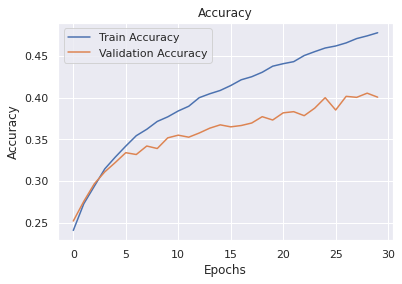

In [ ]:
plt.figure(0)
plt.plot(history_7a.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_7a.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

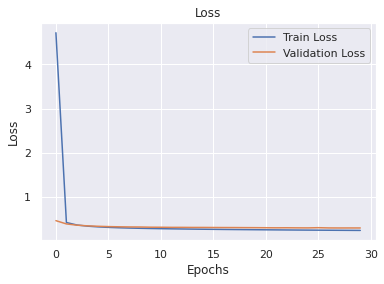

In [ ]:
plt.figure(0)
plt.plot(history_7a.history['loss'], label = 'Train Loss')
plt.plot(history_7a.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_bai7 = model_7a.predict(X_test_bai7_reshaped)
y_pred_bai7 = np.argmax(y_pred_bai7, axis = -1)
accuracy = round(accuracy_score(y_test_bai7, y_pred_bai7)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 38.52%


### **Bài 7b**:
Thực hiện huấn luyện mô hình mạng neural ở bài 1 với kỹ thuật `regularization` 
cho tham số $W$ và $b$ với $\lambda = 0.01$. Cho biết kết quả huấn luyện mô hình trước và sau khi áp dụng kỹ thuật `regularization` (Dựa vào đồ thị học). 

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_7b = Sequential()

model_7b.add(Dense(3072, input_shape=(3072, ), 
                   kernel_regularizer = l2 (0.01),
                   bias_regularizer = l2 (0.01),
                   activation='relu'))
model_7b.add(Dense(10, input_shape=(10, ), 
                   kernel_regularizer = l2 (0.01),
                   bias_regularizer = l2 (0.01),
                   activation='sigmoid'))

In [ ]:
model_7b.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                30730     
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=1e-3)
Loss = BinaryCrossentropy()
model_7b.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_7b = model_7b.fit(X_train_bai7_reshaped, y_train_bai7_new, 
                          validation_data=(X_dev_bai7_reshaped, y_dev_bai7_new),
                          batch_size=128, epochs=30)

Epoch 1/30
352/352 [==============================] - 4s 10ms/step - loss: 35.8810 - accuracy: 0.2442 - val_loss: 30.9638 - val_accuracy: 0.2504
Epoch 2/30
352/352 [==============================] - 3s 9ms/step - loss: 30.6893 - accuracy: 0.2816 - val_loss: 30.4525 - val_accuracy: 0.2892
Epoch 3/30
352/352 [==============================] - 3s 9ms/step - loss: 30.2080 - accuracy: 0.3038 - val_loss: 30.0008 - val_accuracy: 0.2934
Epoch 4/30
352/352 [==============================] - 3s 9ms/step - loss: 29.7637 - accuracy: 0.3213 - val_loss: 29.5715 - val_accuracy: 0.3128
Epoch 5/30
352/352 [==============================] - 3s 9ms/step - loss: 29.3356 - accuracy: 0.3357 - val_loss: 29.1553 - val_accuracy: 0.3118
Epoch 6/30
352/352 [==============================] - 3s 9ms/step - loss: 28.9182 - accuracy: 0.3508 - val_loss: 28.7408 - val_accuracy: 0.3378
Epoch 7/30
352/352 [==============================] - 3s 9ms/step - loss: 28.5090 - accuracy: 0.3614 - val_loss: 28.3414 - val_accuracy

#### Visualization Loss & Accuracy

##### Accuracy

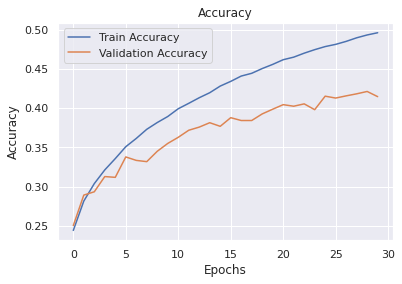

In [ ]:
plt.figure(0)
plt.plot(history_7b.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_7b.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

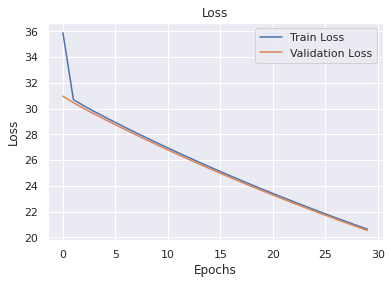

In [ ]:
plt.figure(0)
plt.plot(history_7b.history['loss'], label = 'Train Loss')
plt.plot(history_7b.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_bai7 = model_7b.predict(X_test_bai7_reshaped)
y_pred_bai7 = np.argmax(y_pred_bai7, axis = -1)
accuracy = round(accuracy_score(y_test_bai7, y_pred_bai7)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 41.34%


#### Kết luận:


*   Accuracy trên tập train và trên trập dev thấp. Mô hình có học được nhưng học chậm, kết quả không được tốt. Accuracy trên tập train $\sim 50.0\%$ , accuracy trên tập dev $\sim 42.0\%$, chênh lệnh khoảng 8.0\%. Khoảng cách chênh lệch vẫn chưa giảm, hay nói cách khác là vẫn chưa khắc phục được hiện tượng Overfitting ở bài 7a bằng kỹ thuật regularization.
*   Loss giảm nhanh và đều qua các epoch, không có hiện tượng giảm đột ngột như bài 7a. Giá trị loss của train và dev gần như bằng nhau qua các epoch.
*   Accuracy của mô hình khi kiểm tra trên tập test khá thấp (Accuracy test = $41.34\%$), cao hơn so với accuracy test của mô hình ở bài 7a. Nhưng mô hình vẫn còn bị overfitting và accuracy trên tập test thấp nên mô hình này là vẫn còn tệ.




### **Bài 7c**:
Thực hiện huấn luyện mô hình mạng neural ở bài 1 với kỹ thuật khởi tạo tham 
số cho tham số $W$. Nếu sử dụng kỹ thuật khởi tạo tham số là 1 cho tham số $W$ thì kết quả độ chính xác mô hình như thế nào? 

#### Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_7c = Sequential()

model_7c.add(Dense(3072, input_shape=(3072, ), 
                   kernel_regularizer = l2 (0.01),
                   bias_regularizer = l2 (0.01),
                   activation='relu'))
model_7c.add(Dense(10, input_shape=(10, ), 
                   kernel_regularizer = l2 (0.01),
                   bias_regularizer = l2 (0.01),
                   activation='sigmoid'))

In [ ]:
model_7c.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                30730     
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện model

In [ ]:
# Compile model
Optimizer = SGD(learning_rate=1e-3)
Loss = BinaryCrossentropy()
callback = EarlyStopping(monitor='val_loss', patience=2)
model_7c.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [ ]:
# Training model
history_7c = model_7c.fit(X_train_bai7_reshaped, y_train_bai7_new, 
                          validation_data=(X_dev_bai7_reshaped, y_dev_bai7_new),
                          batch_size=8, epochs=100,
                          callbacks=[callback])

Epoch 1/100
5625/5625 [==============================] - 36s 6ms/step - loss: 28.3672 - accuracy: 0.2643 - val_loss: 24.9891 - val_accuracy: 0.3090
Epoch 2/100
5625/5625 [==============================] - 36s 6ms/step - loss: 22.3956 - accuracy: 0.3407 - val_loss: 19.9963 - val_accuracy: 0.3590
Epoch 3/100
5625/5625 [==============================] - 36s 6ms/step - loss: 17.9279 - accuracy: 0.3769 - val_loss: 16.0173 - val_accuracy: 0.3864
Epoch 4/100
5625/5625 [==============================] - 36s 6ms/step - loss: 14.3642 - accuracy: 0.3967 - val_loss: 12.8402 - val_accuracy: 0.3934
Epoch 5/100
5625/5625 [==============================] - 36s 6ms/step - loss: 11.5197 - accuracy: 0.4143 - val_loss: 10.3046 - val_accuracy: 0.3984
Epoch 6/100
5625/5625 [==============================] - 37s 7ms/step - loss: 9.2486 - accuracy: 0.4267 - val_loss: 8.2913 - val_accuracy: 0.3848
Epoch 7/100
5625/5625 [==============================] - 36s 6ms/step - loss: 7.4358 - accuracy: 0.4365 - val_loss

#### Visualization Loss & Accuracy

##### Accuracy

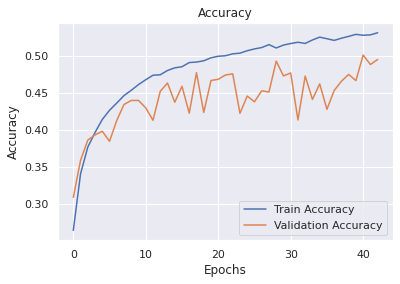

In [ ]:
plt.figure(0)
plt.plot(history_7c.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_7c.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

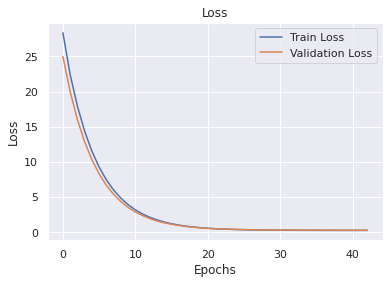

In [ ]:
plt.figure(0)
plt.plot(history_7c.history['loss'], label = 'Train Loss')
plt.plot(history_7c.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [ ]:
y_pred_bai7 = model_7c.predict(X_test_bai7_reshaped)
y_pred_bai7 = np.argmax(y_pred_bai7, axis = -1)
accuracy = round(accuracy_score(y_test_bai7, y_pred_bai7)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 47.65%


#### Kết luận:


*   Accuracy trên tập train và trên trập dev thấp. Mô hình có học được nhưng học chậm, kết quả không được tốt. Accuracy trên tập train $\sim 53.0\%$ , accuracy trên tập dev $\sim 50.0\%$, chênh lệnh khoảng 3.0\%. Khoảng cách chênh lệch đã giảm đi đáng kể, hay nói cách khác là đã phục được hiện tượng overfitting, nhưng vẫn còn overfitting nhẹ.
*   Accuracy trên tập train tăng và có xu hướng hội tụ qua các epoch, còn accuracy trên tập dev lại dao động mạnh (lúc tăng lúc giảm) và chưa có xu hướng hội tụ.
*   Loss giảm nhanh và đều qua các epoch. Giá trị loss của train và dev gần như bằng nhau qua các epoch. Loss của train vàdev hội tụ cùng nhau (khoảng epoch thứ 25)
*   Thời gian training model sẽ tăng lên khi giảm batch size.
*   Mô hình đã dừng sớm ở epoch thứ 43 thay vì chạy hết cả 100 epoch. Nguyên nhân là vì val\_loss đã tăng liên tiếp 2 lần nên mô hình bị dừng sớm để tránh hiện tượng bị underfitting.
*   Accuracy của mô hình khi kiểm tra trên tập test khá thấp (Accuracy test = 47.65\%), cao hơn so với accuracy test của mô hình ở bài 7a, 7b. Mặc dù mô hình đã giảm đi hiện tượng bị overfitting nhưng accuracy trên tập test thấp nên mô hình này là vẫn còn tệ.
*   Trong 3 mô hình bài 7a, 7b, 7c thì mô hình bài 7c là tốt nhất trong 3 mô hình (accuracy = 47.65\%), nhưng nhìn chung thì mô hình vẫn chưa tốt.


